<a href="https://colab.research.google.com/github/Muyiiwaa/python_and_sql_4_data-analysis/blob/master/Exploratory_Data_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mysql.connector
from IPython.display import clear_output

In [2]:
# connecting to the database

# list the database creds.
host_name = input('host: ')
db_name = input('db_name: ')
password = input('password: ')
port = input('port: ')
username = input('user: ')
clear_output()
# setup database connection object
connection = mysql.connector.connect(
    host = host_name,
    database = db_name,
    passwd = password,
    port = port,
    user = username
)

# load the resulting query into a pandas dataframe
query = """
 select o.orderid, o.shippeddate, o.requireddate,
 concat_ws(' ', e.firstname, e.lastname) as staff,
 s.companyname, datediff(o.shippeddate, o.requireddate) as delivery_days,
 od.quantity, od.unitprice, p.productname
 from Orders as o
 join `Order Details` as od on od.orderid = o.orderid
 join Employees as e on e.employeeid = o.employeeid
 join Shippers as s on s.shipperid = o.shipvia
 join Products as p on p.productid = od.productid;
 """

main_data = pd.read_sql(sql=query, con=connection)
main_data.head()

/tmp/ipython-input-2-656586815.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  main_data = pd.read_sql(sql=query, con=connection)


,orderid,shippeddate,requireddate,staff,companyname,delivery_days,quantity,unitprice,productname
0,10293,1996-09-11,1996-09-26,Nancy Davolio,Federal Shipping,-15.0,12,50.0,Carnarvon Tigers
1,10293,1996-09-11,1996-09-26,Nancy Davolio,Federal Shipping,-15.0,10,3.6,Guaran Fantstica
2,10293,1996-09-11,1996-09-26,Nancy Davolio,Federal Shipping,-15.0,5,35.1,Vegie-spread
3,10293,1996-09-11,1996-09-26,Nancy Davolio,Federal Shipping,-15.0,6,6.2,Rhnbru Klosterbier
4,10306,1996-09-23,1996-10-14,Nancy Davolio,Federal Shipping,-21.0,10,20.7,Nord-Ost Matjeshering


In [3]:
# filter out the late orders
data = main_data[main_data['delivery_days'] > 0].copy()

# reset the index
data.reset_index(drop = True, inplace = True)
data.head()

,orderid,shippeddate,requireddate,staff,companyname,delivery_days,quantity,unitprice,productname
0,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,40,40.0,Northwoods Cranberry Sauce
1,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,28,53.0,Manjimup Dried Apples
2,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,10,34.0,Camembert Pierrot
3,10827,1998-02-06,1998-01-26,Nancy Davolio,United Package,11.0,15,31.0,Ikura
4,10827,1998-02-06,1998-01-26,Nancy Davolio,United Package,11.0,21,18.0,Chartreuse verte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderid        92 non-null     int64         
 1   shippeddate    92 non-null     datetime64[ns]
 2   requireddate   92 non-null     datetime64[ns]
 3   staff          92 non-null     object        
 4   companyname    92 non-null     object        
 5   delivery_days  92 non-null     float64       
 6   quantity       92 non-null     int64         
 7   unitprice      92 non-null     float64       
 8   productname    92 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 6.6+ KB


In [5]:
# convert orderid to strings.

data = data.astype(
    {
        'orderid':'str'
    })

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderid        92 non-null     object        
 1   shippeddate    92 non-null     datetime64[ns]
 2   requireddate   92 non-null     datetime64[ns]
 3   staff          92 non-null     object        
 4   companyname    92 non-null     object        
 5   delivery_days  92 non-null     float64       
 6   quantity       92 non-null     int64         
 7   unitprice      92 non-null     float64       
 8   productname    92 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 6.6+ KB


In [6]:
# basic descriptive statistics
data.describe()

,shippeddate,requireddate,delivery_days,quantity,unitprice
count,92,92,92.000000,92.000000,92.000000
mean,1997-08-01 11:28:41.739130496,1997-07-26 07:18:15.652173952,6.173913,24.641304,34.722717
min,1996-08-23 00:00:00,1996-08-21 00:00:00,1.000000,1.000000,2.000000
25%,1997-03-10 00:00:00,1997-03-04 12:00:00,2.000000,10.000000,14.900000
50%,1997-08-13 00:00:00,1997-08-08 00:00:00,6.000000,20.000000,21.000000
75%,1998-01-15 18:00:00,1998-01-13 00:00:00,7.000000,30.000000,38.250000
max,1998-04-24 00:00:00,1998-04-07 00:00:00,23.000000,120.000000,263.500000
std,NaN,NaN,4.967164,21.247149,41.469664


In [7]:
data.rename(
    columns= {
        'delivery_days':'late_days'
    }, inplace = True
)

## VISUALIZATION

In [8]:
sns.set_style('darkgrid')
sns.set_palette('husl')

<Axes: xlabel='companyname', ylabel='late_days'>

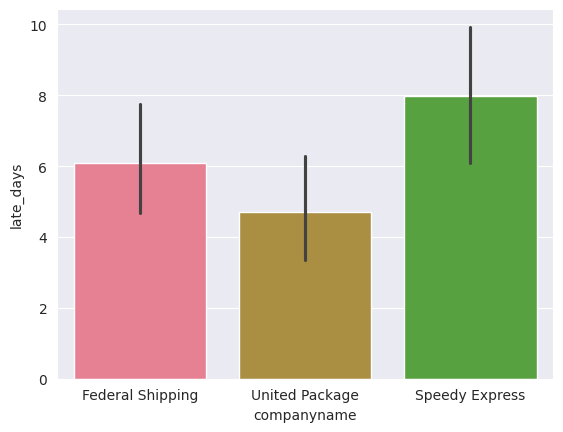

In [9]:
# distribution of average late days

sns.barplot(data=data, x = 'companyname', y = 'late_days', hue ='companyname')

<Axes: xlabel='companyname', ylabel='count'>

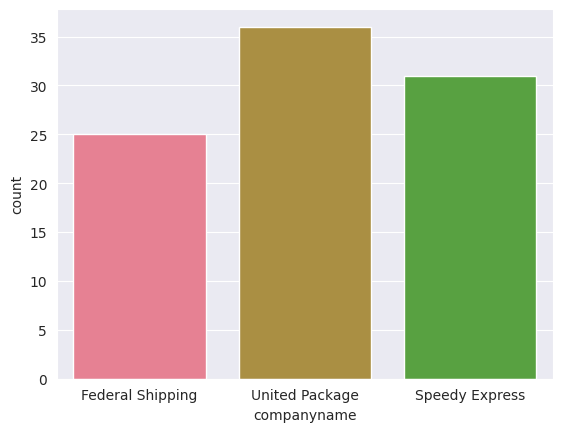

In [10]:
# distribution of average late days

sns.countplot(data=data, x = 'companyname', hue ='companyname')

<Axes: xlabel='companyname', ylabel='count'>

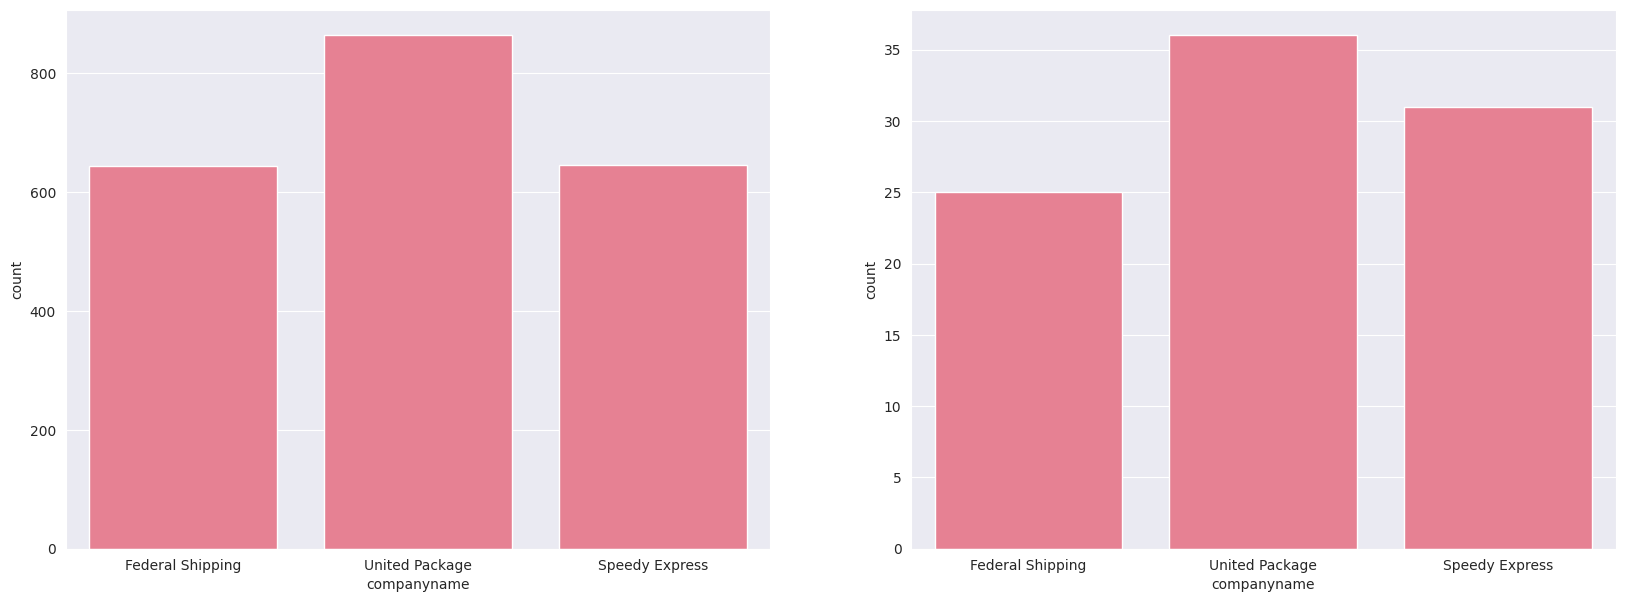

In [11]:
# make a suplots of total_orders, late orders

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 7))
sns.countplot(data=main_data, x='companyname', ax = axes[0])
sns.countplot(data=data, x='companyname', ax = axes[1])

In [12]:
main_pivot = main_data[['companyname','orderid']].groupby(by = 'companyname').count()
late_pivot = data[['companyname','orderid']].groupby(by = 'companyname').count()
main_pivot['late_count'] = late_pivot['orderid']
main_pivot['percentage'] = (main_pivot['late_count']/main_pivot['orderid']) *100
main_pivot

,orderid,late_count,percentage
companyname,,,
Federal Shipping,645,25,3.875969
Speedy Express,646,31,4.798762
United Package,864,36,4.166667


Text(0.5, 1.0, 'Percentage of Late deliveries')

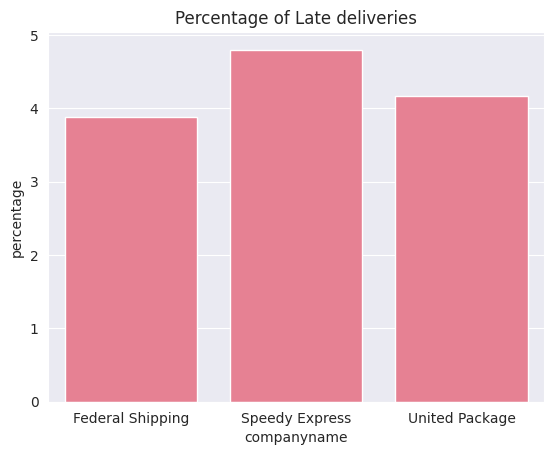

In [13]:
sns.barplot(data=main_pivot, x = 'companyname', y = 'percentage')
plt.title('Percentage of Late deliveries')

#### WRITE FINDINGS HERE

In [14]:
# plotly

px.bar(data_frame = main_pivot, x = main_pivot.index, y ='percentage',
       title = 'Percentage of Late Deliveries')

<Axes: xlabel='quantity', ylabel='late_days'>

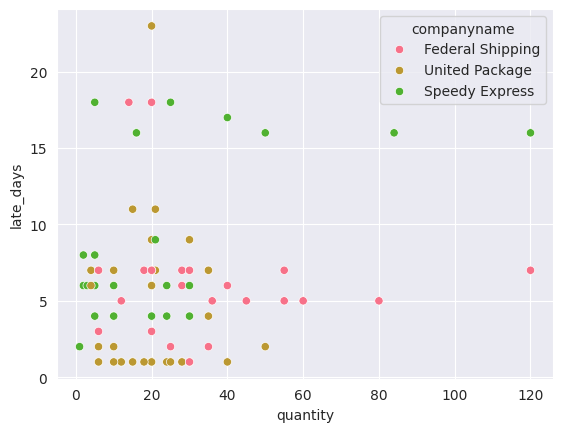

In [15]:
# inspect the relationship between late days and quantity


sns.scatterplot(data = data, x = 'quantity', y='late_days', hue = 'companyname')

## HYPOTHESIS TESTING


#### Steps:
- Define the problem statement.
- set the null and alternative hypothesis. (h0, h1)
- set the level of significance. (alpha)
- compute the test statistic
- make decision using the p-value.



In [16]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
data.head()

,orderid,shippeddate,requireddate,staff,companyname,late_days,quantity,unitprice,productname
0,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,40,40.0,Northwoods Cranberry Sauce
1,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,28,53.0,Manjimup Dried Apples
2,10709,1997-11-20,1997-11-14,Nancy Davolio,Federal Shipping,6.0,10,34.0,Camembert Pierrot
3,10827,1998-02-06,1998-01-26,Nancy Davolio,United Package,11.0,15,31.0,Ikura
4,10827,1998-02-06,1998-01-26,Nancy Davolio,United Package,11.0,21,18.0,Chartreuse verte


In [23]:
# 1. problem statement:
# Inspecting the relationship between late days and quantity

# 2. set the hypothesis
null = 'There is no significant relationship between late days and quantity'
alternative = 'There is a significant relationship between late days and quantity'

# 3. set the level of significance
alpha = 0.05

# 4. compute the test
test_statistic, pvalue = stats.spearmanr(data['late_days'].values, data['quantity'].values)

# 5. make decision
if pvalue < alpha:
  print(f'{alternative} @ pvalue of {pvalue}')
else:
  print(f'{null} @ pvalue of {pvalue}')

There is no significant relationship between late days and quantity @ pvalue of 0.5995500744058833


### Inspect the relationship between multiple variables

In [25]:
data[['quantity','late_days','unitprice']].corr(method='spearman')

,quantity,late_days,unitprice
quantity,1.000000,0.055456,-0.078618
late_days,0.055456,1.000000,-0.025901
unitprice,-0.078618,-0.025901,1.000000


<Axes: xlabel='quantity', ylabel='Density'>

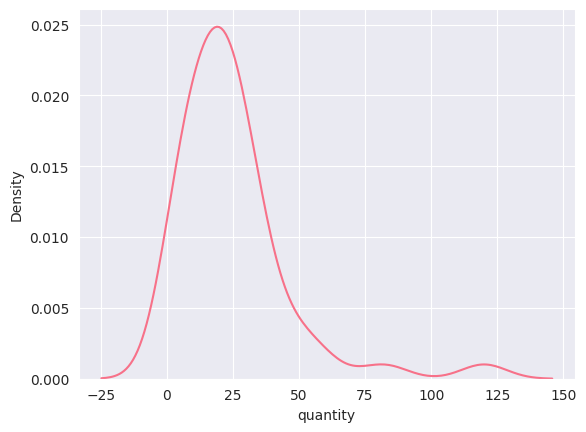

In [18]:
sns.kdeplot(data=data, x = 'quantity')

### TEST OF DIFFERENCE

In [33]:
# 1. problem statement:
# Inspecting the difference in late days accross the shipping companies.

# 2. set the hypothesis
null = 'There is no significant difference between late days across shipping companies'
alternative = 'There is a significant difference between late days across shipping companies'

# 3. set the level of significance
alpha = 0.05

# 4. compute the test
test_statistic, pvalue = stats.f_oneway(data[data['companyname']=='Federal Shipping']['late_days'],
               data[data['companyname']=='United Package']['late_days'],
               data[data['companyname']=='Speedy Express']['late_days'])

# 5. make decision
if pvalue < alpha:
  print(f'{alternative} @ pvalue of {pvalue}')
else:
  print(f'{null} @ pvalue of {pvalue}')

There is a significant difference between late days across shipping companies @ pvalue of 0.024915976682666856


In [31]:
data[data['companyname']=='Federal Shipping']['late_days'].values

array([ 6.,  6.,  6.,  1.,  7.,  7.,  7.,  7.,  3.,  3.,  5.,  5.,  5.,
        5.,  5.,  5.,  1.,  2.,  2., 18., 18.,  7.,  7.,  7.,  7.])

In [37]:
model = smf.ols(formula='late_days ~ C(companyname) + C(staff) + C(companyname):C(staff)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 16, but rank is 11



,sum_sq,df,F,PR(>F)
C(companyname),NaN,2.0,NaN,NaN
C(staff),446.347437,8.0,2.558214,0.061631
C(companyname):C(staff),496.718927,16.0,1.423457,0.180947
Residual,1592.095455,73.0,NaN,NaN
